In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_zeros_matrix(size:int):
  matrix = np.array([])
  for i in range(0, size):
    for j in range(0, size):
      matrix = np.append(matrix, 0)
  matrix = matrix.reshape(size, size)
  return matrix

In [ ]:
def qualifier(matrix:int):
  a = 0.0
  b = 0.0
  c = 0
  if (len(matrix) > 2):
    for i in range(0, len(matrix)):
      b = 1.0
      for j in range(0, len(matrix)):
        c = j + i
        if (c >= len(matrix)):
          c -= len(matrix)
        b = b * matrix[j][c]
      a += b
    for i in range(len(matrix) - 1, -1, -1):
      b = 1.0
      for j in range(0, len(matrix)):
        c = i - j
        if (c < 0):
          c += len(matrix)
        b = b * matrix[j][c]
      a -= b
  else:
    a = (matrix[0][0] * matrix[1][1]) - (matrix[0][1] * matrix[1][0])
  return a

In [ ]:
def inverted(matrix:int):
  buffer = 0.0
  qual = qualifier(matrix)

  if (qual != 0):
    transpose = matrix
    for i in range(0, len(matrix)):
      for j in range(i + 1, len(matrix)):
        buffer = transpose[j][i]
        transpose[j][i] = transpose[i][j]
        transpose[i][j] = buffer

    minor = np.zeros((len(matrix), len(matrix)))
    auxilary = np.zeros((len(matrix) - 1, len(matrix) - 1))
    for i in range(0, len(matrix)):
      for j in range(0, len(matrix)):
        for k in range (0 , len(matrix)):
          for l in range (0, len(matrix)):
            if (k != i and l != j):
              if (k > i):
                if (l > j):
                  auxilary[k - 1][l - 1] = transpose[l][k]
                else:
                  auxilary[k - 1][l] = transpose[l][k]     
              else:
                if (l > j):
                  auxilary[k][l - 1] = transpose[l][k]
                else:
                  auxilary[k][l] = transpose[l][k]
        if (len(auxilary) >= 2):
          minor[i][j] = qualifier(auxilary)
        else:
          minor[i][j] = auxilary[0][0]
    reversed = np.zeros((len(matrix), len(matrix)))
    for i in range(0, len(matrix)):
      for j in range(0, len(matrix)):
        reversed[j][i] = (minor[j][i] * (1 / qualifier(matrix)))
    
    for i in range(0, len(matrix)):
      for j in range(0, len(matrix)):
        if (i % 2 == 0):
          if (j % 2 != 0):
            reversed[i][j] = reversed[i][j] * -1
        else:
          if (j % 2 == 0):
            reversed[i][j] = reversed[i][j] * -1           
  else:
    print("Определитель матрицы равняется нулю!")
  return reversed

In [ ]:
def get_predicted_y(x:float, array:float, degree:int):
  y = 0.0
  for i in range(0, len(array)):
    y += array[i] * np.power(x, degree - i)
  return y

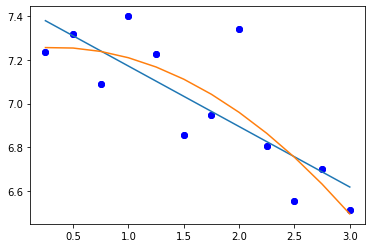

In [ ]:
x = np.array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])
y = np.array([7.235, 7.318, 7.09, 7.4, 7.228, 6.856, 6.947, 7.34, 6.808, 6.554, 6.7, 6.513])
fig, ax = plt.subplots()
for degree in range(1, 3):
  a = np.array([])
  b = np.array([]) 
  matrix = get_zeros_matrix(degree + 1)
  for i in range(0, degree + 1):
    for j in range(0, degree + 1):
      for l in range(0, len(x)):
        matrix[i][j] += np.power(x[l], (degree * 2) - j - i)
  inverted_matrix = inverted(matrix)
  for i in range(degree, -1, -1):
    sum = 0.0
    for j in range(0, len(x)):
      sum += np.power(x[j], i) * y[j]
    a = np.append(a, sum)
  for i in range(0, len(matrix)):
    sum = 0.0
    for j in range(0, len(matrix)):
      sum += inverted_matrix[i][j] * a[j]
    b = np.append(b, sum)
  y_predicted = np.array([])
  for i in range(0, len(x)):
    y_predicted = np.append(y_predicted, get_predicted_y(x[i], b, degree))
  ax.scatter(x, y, color = 'blue')
  ax.plot(x, y_predicted)
plt.show()